c:\projet stage d'été 2025\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407

Confusion Matrix:
 [[915 118]
 [159 215]]
ROC AUC: 0.836503667734805


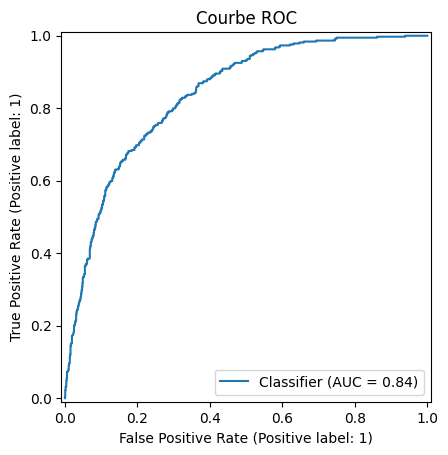

In [8]:
import sys, os
sys.path.append(os.path.abspath("../src"))

from model_telco import load_and_prepare_data, train_logistic_model, evaluate_model

# 📥 Charger les données
df = load_and_prepare_data("../data/WA_Fn_UseC_Telco_Customer_Churn.csv")
df.head()

# 🤖 Entraîner un modèle de régression logistique
results = train_logistic_model(df)

# 📊 Évaluer les performances
evaluate_model(results)

# 📈 Visualisation ROC
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

RocCurveDisplay.from_predictions(results["y_test"], results["y_proba"])
plt.title("Courbe ROC")
plt.show()


 Interprétation rapide
Le modèle prédit bien les clients qui restent (classe 0) avec 89% de rappel.

Il a plus de mal à détecter les clients qui partent (classe 1), ce qui est courant dans les cas de churn à classe déséquilibrée.

Le ROC AUC > 0.83 est un bon indicateur : le modèle distingue bien les deux classes.